In [1]:
import sys
sys.path.append("../") # adding the path to read the utils file
import pandas as pd
from utils import *
import networkx as nx

pd.set_option('display.max_columns', None)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# you should run making_hikari2022_csv.ipynb before running this cell, since the two csv given with the paper have two differences
# to see what are the data types and the features of the dataset, you can take a look on the utils file
ds = pd.concat([
    pd.read_csv('../datasets/HIKARI-2021/ALLFLOWMETER_HIKARI2021.csv', dtype=dtype_hikari, usecols=selected_features_hikari),
    pd.read_csv('../datasets/HIKARI-2021/ALLFLOWMETER_HIKARI2022.csv', dtype=dtype_hikari, usecols=selected_features_hikari)],
    ignore_index=True)
ds.head()

,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,2.207588,15,14,6,6,6.794746,6.341763,13.136509,0.933333,464,20,40,492,32,44,2,2,2,6,5,26,0,0,0,0,0,742,1826.0,121.733333,220.736581,0,1448,5025.0,358.928571,552.239840,0,1448,6851.0,236.241379,424.859275,18.119812,1.963762e+06,2.207603e+06,1.576859e+05,5.205052e+05,7.867813,2.032929e+06,2.177950e+06,1.675346e+05,5.606267e+05,7.867813,1.963762e+06,2.207603e+06,78842.963491,3.696378e+05,3103.387105,7.5,7.0,913.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.207603e+06,2.207603e+06,2.207603e+06,2.207603e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,True
1,15.624266,15,14,6,6,0.960045,0.896042,1.856087,0.933333,488,20,44,468,32,44,2,2,2,6,5,26,0,0,0,0,0,745,1829.0,121.933333,221.339257,0,1448,5025.0,358.928571,552.239840,0,1448,6854.0,236.344828,424.987166,20.980835,1.534300e+07,1.562428e+07,1.116020e+06,4.094889e+06,20.980835,1.541144e+07,1.559517e+07,1.199628e+06,4.270148e+06,10.013580,1.534300e+07,1.562428e+07,558009.896960,2.897622e+06,438.676603,7.5,7.0,914.5,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.883792e+04,2.524381e+05,2.812760e+05,1.406380e+05,158109.181742,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,True
2,12.203357,14,13,6,5,1.147225,1.065281,2.212506,0.928571,432,20,40,448,32,44,2,2,2,6,5,24,0,0,0,0,0,744,1828.0,130.571429,226.803444,0,2896,5025.0,386.538462,817.479013,0,2896,6853.0,253.814815,592.570284,36.001205,1.196814e+07,1.220338e+07,9.387216e+05,3.314032e+06,15.020370,1.203674e+07,1.217482e+07,1.014569e+06,3.471107e+06,15.020370,1.196814e+07,1.220338e+07,469360.810060,2.345336e+06,561.566789,7.0,6.5,914.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.891302e+04,2.063251e+05,2.352381e+05,1.176190e+05,125449.251656,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,True
3,9.992448,14,13,6,5,1.401058,1.300983,2.702041,0.928571,432,20,40,436,32,44,2,2,2,6,5,24,0,0,0,0,0,744,1828.0,130.571429,226.803444,0,2896,5025.0,386.538462,817.479013,0,2896,6853.0,253.814815,592.570284,50.067902,9.759205e+06,9.992470e+06,7.686515e+05,2.701448e+06,20.980835,9.828447e+06,9.963348e+06,8.302790e+05,2.833716e+06,20.980835,9.759205e+06,9.992470e+06,384325.770231,1.912152e+06,685.817940,7.0,6.5,914.0,2512.5,0.0,0.0,0.0,0.0,0.0,0.0,2.952909e+04,2.037361e+05,2.332652e+05,1.166326e+05,123182.931318,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,True
4,7.780611,14,14,6,5,1.799345,1.799345,3.598689,1.000000,432,20,40,480,32,44,2,2,2,6,5,25,0,0,0,0,0,744,1828.0,130.571429,226.803444,0,2896,5025.0,358.928571,792.173394,0,2896,6853.0,244.750000,583.468215,16.927719,7.545305e+06,7.780620e+06,5.985092e+

In [3]:
ds.groupby('traffic_category')['down_up_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
traffic_category,,,,,,,,
Background,170151.0,0.810244,0.721923,0.000000,0.636364,1.000000,1.000000,6.00000
Benign,562335.0,2.015250,32.321667,0.000000,0.750000,1.000000,1.000000,4625.00000
Bruteforce,7988.0,8.794107,89.440773,0.000000,0.769231,0.924528,1.019231,1225.00000
Bruteforce-XML,8795.0,20.071672,128.065872,0.666667,0.823529,0.928571,0.928571,875.00000
Probing,23388.0,1.298040,0.119266,0.777778,1.300000,1.300000,1.333333,1.97669
XMRIGCC CryptoMiner,10874.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [5]:
ds.groupby('traffic_category')['fwd_pkts_payload.max'].describe()

,count,mean,std,min,25%,50%,75%,max
traffic_category,,,,,,,,
Background,170151.0,150.241956,304.968617,0.0,0.0,40.0,127.0,15741.0
Benign,562335.0,185.035027,295.321313,0.0,0.0,36.0,426.0,34560.0
Bruteforce,7988.0,390.018152,71.848177,0.0,357.0,373.0,425.0,786.0
Bruteforce-XML,8795.0,746.768960,12.594155,0.0,746.0,747.0,748.0,925.0
Probing,23388.0,517.000000,0.000000,517.0,517.0,517.0,517.0,517.0
XMRIGCC CryptoMiner,10874.0,52.455858,30.228757,40.0,40.0,50.0,50.0,232.0


In [5]:
ds.groupby('traffic_category')['flow_RST_flag_count'].describe()

,count,mean,std,min,25%,50%,75%,max
traffic_category,,,,,,,,
Background,170151.0,0.461519,1.146705,0.0,0.0,0.0,1.0,110.0
Benign,562335.0,0.334073,0.628662,0.0,0.0,0.0,1.0,24.0
Bruteforce,7988.0,2.279920,0.530301,0.0,2.0,2.0,3.0,5.0
Bruteforce-XML,8795.0,1.991700,0.104696,0.0,2.0,2.0,2.0,4.0
Probing,23388.0,1.099025,0.302684,0.0,1.0,1.0,1.0,3.0
XMRIGCC CryptoMiner,10874.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [6]:
ds.groupby('traffic_category')['flow_FIN_flag_count'].describe()

,count,mean,std,min,25%,50%,75%,max
traffic_category,,,,,,,,
Background,170151.0,0.438070,0.845604,0.0,0.0,0.0,0.0,14.0
Benign,562335.0,0.846549,1.034040,0.0,0.0,0.0,2.0,140.0
Bruteforce,7988.0,2.030921,0.199336,0.0,2.0,2.0,2.0,4.0
Bruteforce-XML,8795.0,1.999886,0.108224,0.0,2.0,2.0,2.0,5.0
Probing,23388.0,1.094749,0.293604,0.0,1.0,1.0,1.0,2.0
XMRIGCC CryptoMiner,10874.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [7]:
ds.groupby('traffic_category')['bwd_header_size_min'].describe()

,count,mean,std,min,25%,50%,75%,max
traffic_category,,,,,,,,
Background,170151.0,14.285405,11.086989,0.0,8.0,8.0,20.0,40.0
Benign,562335.0,19.344590,12.834557,0.0,8.0,20.0,32.0,44.0
Bruteforce,7988.0,31.988983,0.626511,0.0,32.0,32.0,32.0,40.0
Bruteforce-XML,8795.0,31.998181,0.200060,20.0,32.0,32.0,32.0,40.0
Probing,23388.0,31.998974,0.110966,20.0,32.0,32.0,32.0,32.0
XMRIGCC CryptoMiner,10874.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


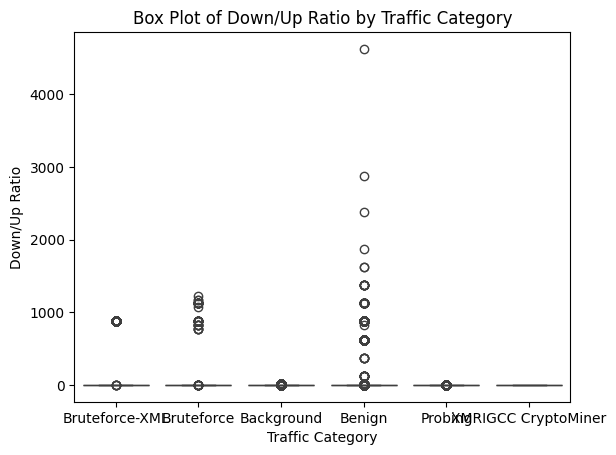

In [5]:
# Create separate box plots for each category
sns.boxplot(data=ds, x='traffic_category', y='down_up_ratio')
plt.xlabel('Traffic Category')
plt.ylabel('Down/Up Ratio')
plt.title('Box Plot of Down/Up Ratio by Traffic Category')
plt.show()

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783531 entries, 0 to 783530
Data columns (total 81 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   flow_duration             783531 non-null  float64
 1   fwd_pkts_tot              783531 non-null  uint64 
 2   bwd_pkts_tot              783531 non-null  uint64 
 3   fwd_data_pkts_tot         783531 non-null  uint64 
 4   bwd_data_pkts_tot         783531 non-null  uint64 
 5   fwd_pkts_per_sec          783531 non-null  float64
 6   bwd_pkts_per_sec          783531 non-null  float64
 7   flow_pkts_per_sec         783531 non-null  float64
 8   down_up_ratio             783531 non-null  float32
 9   fwd_header_size_tot       783531 non-null  uint64 
 10  fwd_header_size_min       783531 non-null  uint8  
 11  fwd_header_size_max       783531 non-null  uint8  
 12  bwd_header_size_tot       783531 non-null  uint64 
 13  bwd_header_size_min       783531 non-null  u

Bisogna controllare tutti gli interi ma anche i bulk_packets

In [4]:
ds.describe()

,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,7.835310e+05,7.835310e+05,7.835310e+05,783531.000000,7.835310e+05,783531.000000,783531.000000,7.835310e+05,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,783531.000000,7.835310e+05,7.835310e+05,783531.000000,783531.000000,783531.000000,7.835310e+05,7.835310e+05,7.835310e+05,783531.000000,783531.000000,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,783531.000000,783531.000000,783531.000000,7.835310e+05,7.835310e+05,7.835310e+05,783531.000000,783531.000000,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,7.835310e+05,783531.000000,783531.000000,783531.000000
mean,7.930232,15.141476,15.202140,6.076205,11.985713,3.475753e+03,2.813504e+03,6.284778e+03,1.975985,5.221322e+02,23.148409,28.325925,4.665602e+02,18.626142,22.381593,0.778524,1.156447,0.418391,5.386756,8.314095,28.377589,0.001020,0.000008,0.001668,0.000037,17.793925,193.943558,1.685628e+03,1.054549e+02,54.541936,22.216197,1167.560257,1.975559e+04,5.381859e+02,3.519654e+02,17.805741,1178.124581,2.144121e+04,4.416836e+02,2.990518e+02,8.931155e+05,5.733389e+06,8.904876e+06,1.332912e+06,1.162227e+06,2.537420e+04,4.618173e+06,6.764059e+06,4.246261e+05,1.293048e+06,8.930607e+05,6.085861e+06,1.011627e+07,1.260414e+06,8.197949e+05,8.433863e+04,10.925990,11.081897,1159.948376,1.210176e+04,9.029155e+01,4.742144e+03,0.043071,1.864668,6.219484e+03,4.148455e+06,8.041311e+05,1.059131e+06,1.148116e+06,8.946945e+05,1.179072e+05,4.571039e+06,5.764442e+06,8.678673e+06,5.109868e+06,6.037600e+05,25885.029520,26880.533083,7417.383553
std,97.220072,390.717612,395.026085,62.401492,393.515497,1.696581e+05,1.579508e+05,3.246767e+05,31.937681,1.484319e+04,12.629693,15.981276,1.259048e+04,12.781371,16.568396,0.999198,1.029890,0.812277,62.129340,145.891623,785.296047,0.032707,0.002767,0.048602,0.006490,32.828224,300.906381,6.378143e+04,3.639657e+03,351.378688,43.025812,2464.742493,3.385688e+05,1.639081e+04,2.860092e+03,32.883272,2464.226347,3.469619e+05,1.280389e+04,4.456432e+03,6.836720e+07,2.356495e+08,2.966493e+08,9.935204e+07,6.019453e+07,1.451423e+06,2.256559e+08,1.885185e+08,2.769771e+07,1.059583e+08,6.836746e+07,3.022425e+08,7.036060e+08,1.011819e+08,3.227715e+07,5.690312e+06,73.305702,80.394173,14522.031819,1.

In [5]:
(sum(ds['flow_RST_flag_count'] > 1) / ds.shape[0]) * 100

8.262978746214253

Test to see if the highest RST flag count belong to the longest flow duration, but it is not the case

In [6]:
ds[ds['flow_duration'] > 180].flow_RST_flag_count.max()

19

In [7]:
ds['flow_duration'].sort_values(ascending=False).head(20)

555927    17942.909297
584355    17925.316660
556904    17925.316531
48067     17393.030600
181654    15615.860670
182497    15577.004825
55056     15529.164556
192062    13544.854760
355600    13140.023498
355579    13140.010083
355599    13140.001211
355745    13124.958436
355601    13108.862599
355742    13108.862466
45286     11957.733628
356254    11940.583404
64389     11763.833370
64546     11649.377209
454267    10795.016877
454384    10790.007114
Name: flow_duration, dtype: float64

Reverse engineering of the duration metrics, apparently the metrics is about seconds

In [8]:
sum(round(ds['fwd_pkts_per_sec'] * ds['flow_duration']) == ds['fwd_pkts_tot']) / ds.shape[0]

0.8873701231986992

In [9]:
ds[round(ds['fwd_pkts_per_sec'] * ds['flow_duration']) != ds['fwd_pkts_tot']].query('flow_duration > 0')[['fwd_pkts_tot', 'fwd_pkts_per_sec', 'flow_duration']]

,fwd_pkts_tot,fwd_pkts_per_sec,flow_duration
555288,3,25.0,119.998662
555318,3,25.0,119.997982
555376,3,25.0,119.997960
555420,3,25.0,119.998978
555646,3,25.0,119.999782
...,...,...,...
775937,3,992.0,3.024195
776537,14,1109.0,12.623988
777334,2,995.0,2.010051
779277,6,2097152.0,0.002861


In [10]:
print("number of connection with more than 1800 seconds of duration:", sum(ds['flow_duration'] > 1800))

number of connection with more than 1800 seconds of duration: 97


In [11]:
print("number of connection with more flag about RST:", sum(ds['flow_RST_flag_count'] > 2))

number of connection with more flag about RST: 15100


In [12]:
print("number of connection with more flag about FIN:", sum(ds['flow_FIN_flag_count'] > 2))

number of connection with more flag about FIN: 4345


In [13]:
ds.columns

Index(['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd

# Analysis of flow_FIN_flag_count

it's supposed to be 2 or less

In [14]:
ds.flow_FIN_flag_count.value_counts()

flow_FIN_flag_count
0      441289
2      253739
1       84158
3        2861
4         470
7         314
5         268
6         207
9         111
8          30
10         24
12         13
11          7
25          7
14          4
13          3
23          3
24          2
16          2
27          1
17          1
48          1
38          1
56          1
21          1
51          1
30          1
98          1
74          1
40          1
58          1
49          1
26          1
15          1
140         1
99          1
33          1
68          1
Name: count, dtype: int64

In [15]:
print("FIN over 2:", sum(ds.flow_FIN_flag_count > 2))
print("FIN over 2:", (sum(ds.flow_FIN_flag_count > 2) / ds.shape[0])*100)

FIN over 2: 4345
FIN over 2: 0.5545409179726137


# Analysis of flow_RST_flag_count

it's supposed to be 2 or less

In [16]:
ds.flow_RST_flag_count.value_counts()

flow_RST_flag_count
0      540984
1      177804
2       49643
3       12620
4        1760
5         416
6         155
7          33
8          29
9          14
12          9
11          8
10          7
15          4
21          4
14          3
54          3
85          2
19          2
18          2
62          2
16          2
17          2
53          1
23          1
46          1
33          1
101         1
110         1
20          1
64          1
56          1
32          1
50          1
61          1
81          1
63          1
42          1
82          1
40          1
76          1
58          1
26          1
31          1
13          1
24          1
Name: count, dtype: int64

In [17]:
print("RST over 2:", sum(ds.flow_RST_flag_count > 2))
print("RST over 2:", (sum(ds.flow_RST_flag_count > 2) / ds.shape[0])*100)

RST over 2: 15100
RST over 2: 1.9271732707448717


In [18]:
ds[ds.flow_FIN_flag_count > 0].Label.value_counts()

Label
False    302083
True      40159
Name: count, dtype: int64

In [19]:
ds[ds.flow_FIN_flag_count == 0].Label.value_counts()

Label
False    430403
True      10886
Name: count, dtype: int64

Analysis of flow_SYN_flag_count

In [20]:
ds.flow_SYN_flag_count.value_counts()

flow_SYN_flag_count
2     337294
0     286494
1     131732
3      20138
4       4884
7       2180
5        675
6         89
8         10
22         9
9          7
21         5
16         3
23         3
13         2
20         2
11         2
12         1
10         1
Name: count, dtype: int64

In [21]:
ds[ds.flow_SYN_flag_count > 0].Label.value_counts()

Label
False    456869
True      40168
Name: count, dtype: int64

In [22]:
ds[ds.flow_SYN_flag_count == 0].Label.value_counts()

Label
False    275617
True      10877
Name: count, dtype: int64

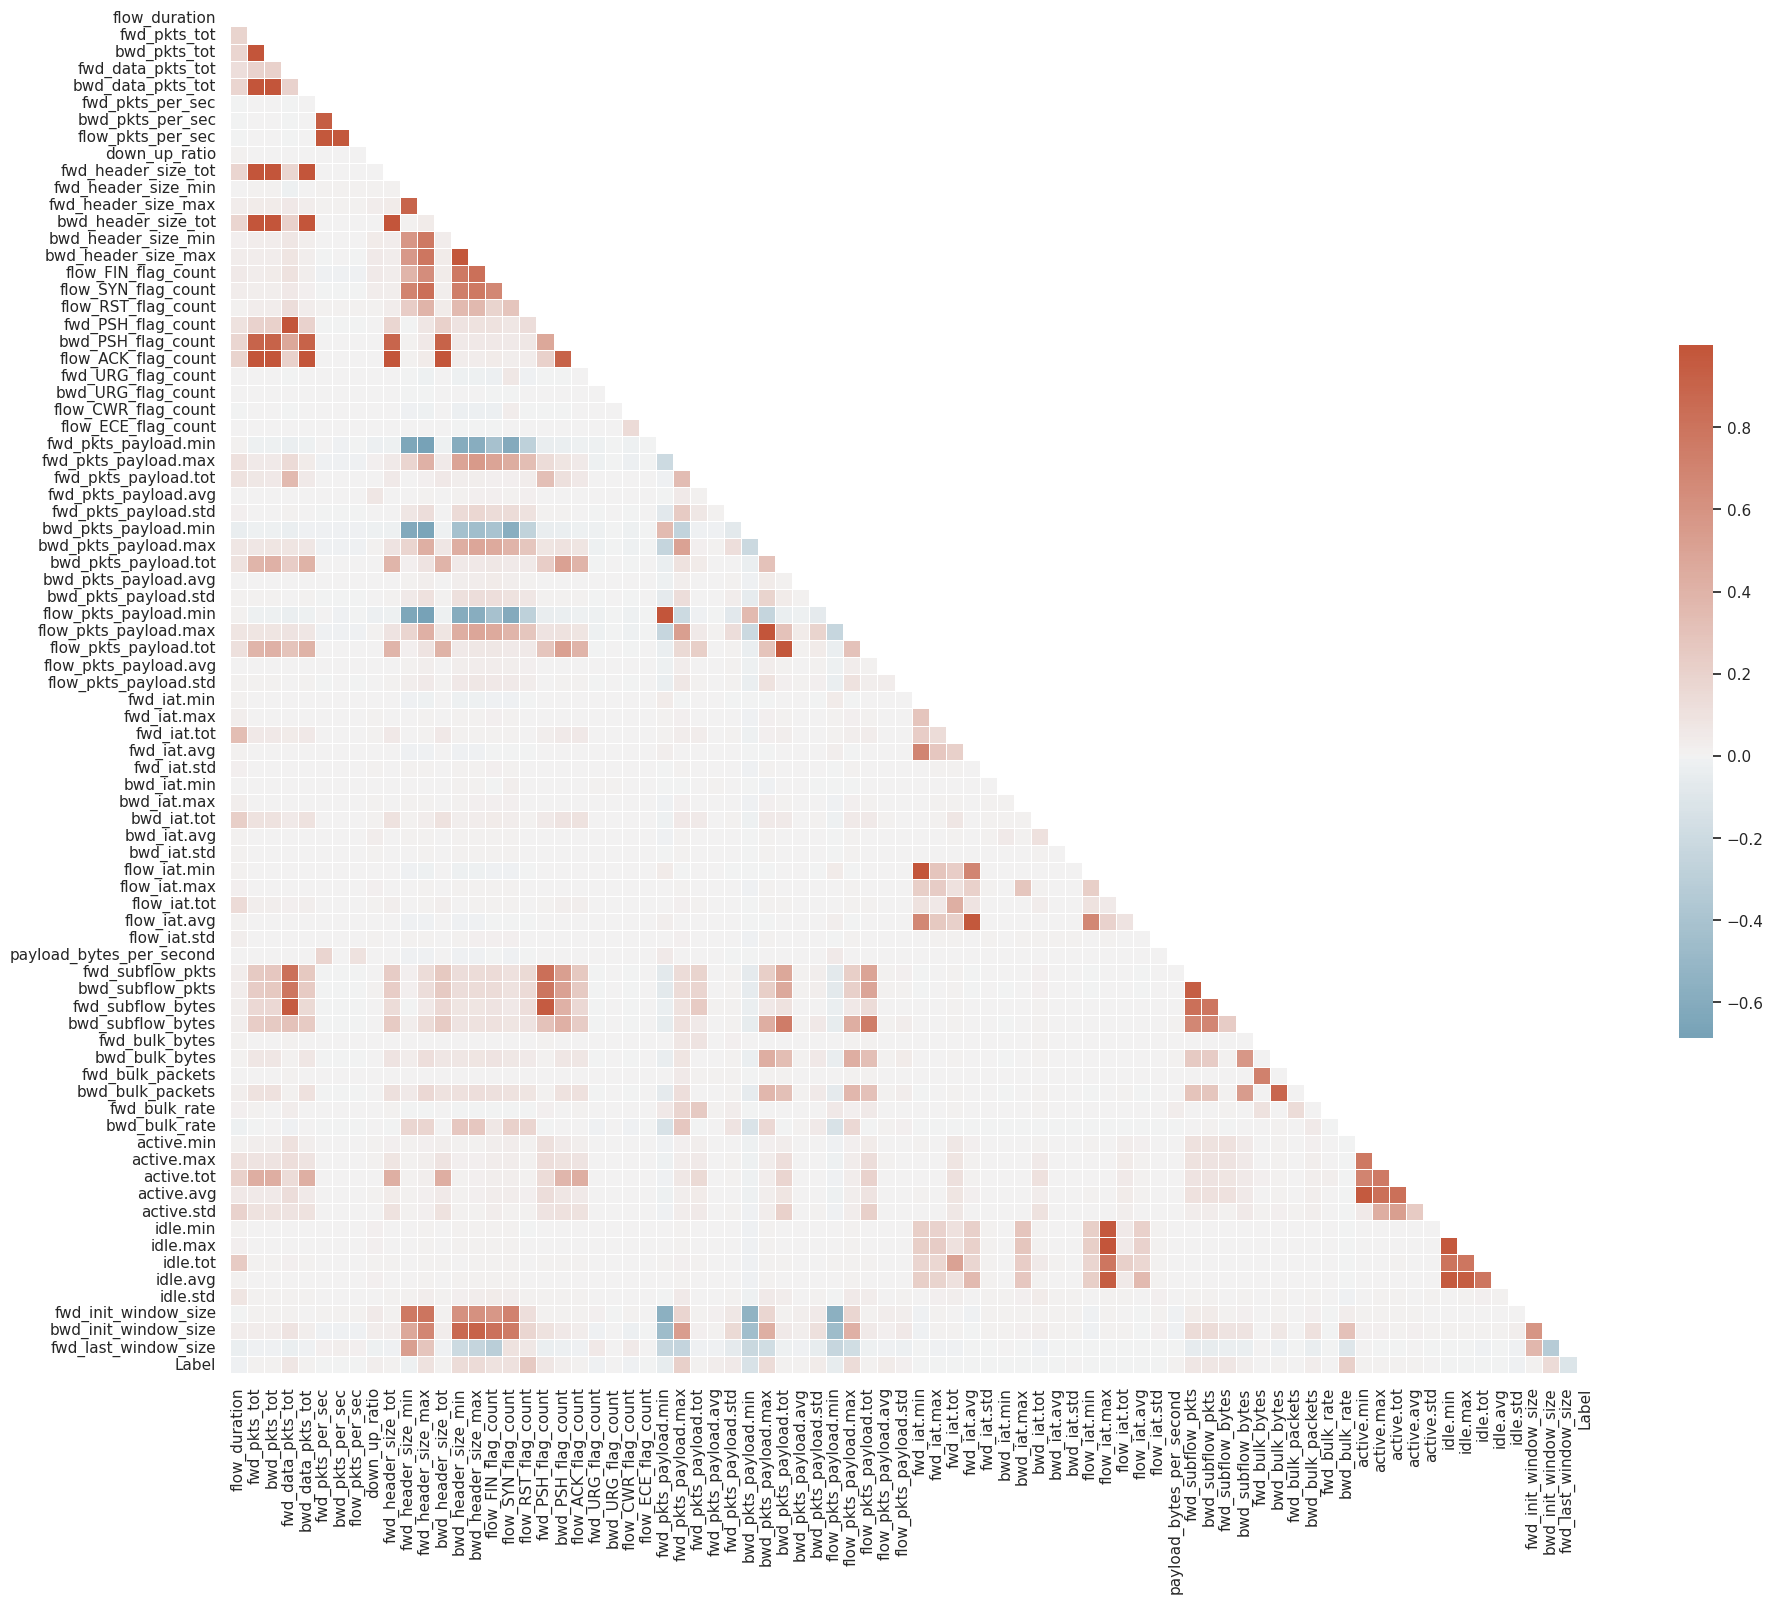

In [23]:
show_corr_matrix(ds)

In [24]:
correlation_matrix = ds.select_dtypes(include=['number','bool']).corr()

In [25]:
# Finding pairs with correlation greater than 0.9
correlation_threshold = 0.97
correlation_pairs = []

# Iterate through the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            )
            correlation_pairs.append(pair)

print(f"Pairs with correlation over {correlation_threshold * 100}%:")
for pair in correlation_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

Pairs with correlation over 97.0%:
fwd_pkts_tot - bwd_pkts_tot: 0.9977736565346315
fwd_pkts_tot - bwd_data_pkts_tot: 0.9981238640834618
fwd_pkts_tot - fwd_header_size_tot: 0.9983024676710928
fwd_pkts_tot - bwd_header_size_tot: 0.9969284507099473
fwd_pkts_tot - flow_ACK_flag_count: 0.9994240451360137
bwd_pkts_tot - bwd_data_pkts_tot: 0.9993969235398683
bwd_pkts_tot - fwd_header_size_tot: 0.9956196867430672
bwd_pkts_tot - bwd_header_size_tot: 0.999059175317736
bwd_pkts_tot - flow_ACK_flag_count: 0.9994481168048883
fwd_data_pkts_tot - fwd_PSH_flag_count: 0.996370720580026
bwd_data_pkts_tot - fwd_header_size_tot: 0.9963652785942658
bwd_data_pkts_tot - bwd_header_size_tot: 0.998580945909404
bwd_data_pkts_tot - flow_ACK_flag_count: 0.9993157051503467
fwd_pkts_per_sec - flow_pkts_per_sec: 0.9745616615733033
bwd_pkts_per_sec - flow_pkts_per_sec: 0.9747202135752829
fwd_header_size_tot - bwd_header_size_tot: 0.9956178586071448
fwd_header_size_tot - flow_ACK_flag_count: 0.9975134625150415
bwd_hea

In [26]:
correlated_features = []
correlation_with_target = []
feature_name = []

for i in correlation_pairs:
    if i[0] not in correlated_features:
        correlated_features.append(i[0])
    if i[1] not in correlated_features:
        correlated_features.append(i[1])

for i in correlated_features:
    correlation_with_target.append(correlation_matrix['Label'][i])
    feature_name.append(i)

correlation_with_target = pd.DataFrame({'Feature': feature_name, 'Correlation': correlation_with_target})
print(correlation_with_target.shape)

(26, 2)


In [27]:
correlation_with_target["Correlation"] = correlation_with_target["Correlation"].abs()
correlation_with_target.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
12,bwd_header_size_max,0.149017
11,bwd_header_size_min,0.135375
16,flow_pkts_payload.max,0.131481
15,bwd_pkts_payload.max,0.131387
7,fwd_PSH_flag_count,0.073178
6,fwd_data_pkts_tot,0.072526
14,flow_pkts_payload.min,0.053423
13,fwd_pkts_payload.min,0.053417
4,bwd_header_size_tot,0.015100
1,bwd_pkts_tot,0.014471


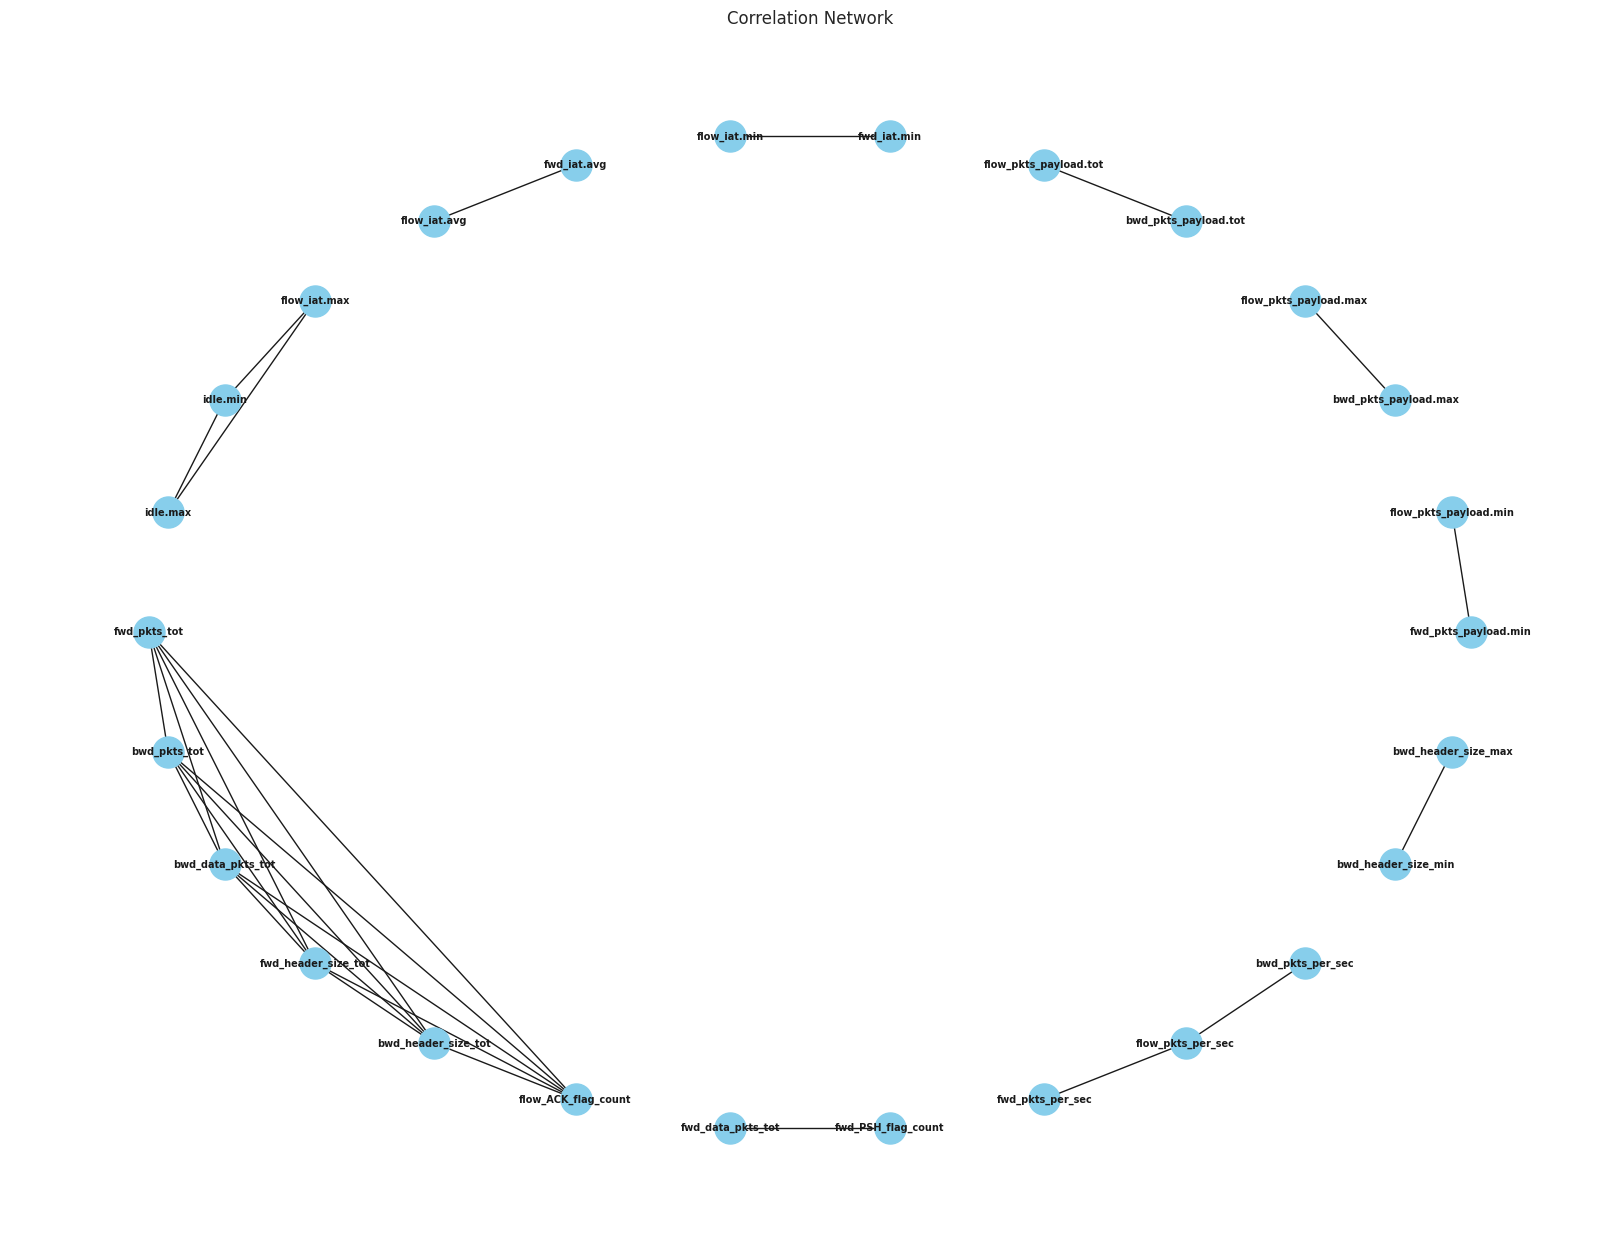

In [28]:
# Create a graph
G = nx.Graph()

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

# Visualizing the graph
plt.figure(figsize=(16, 12))
pos = nx.shell_layout(G)  # Positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=7)
plt.title('Correlation Network')
plt.show()

In [29]:
target_feature = 'Label'

feature_to_remove = []

# Finding connected components (clusters of correlated features)
connected_components = list(nx.connected_components(G))

# Analyzing each cluster
for cluster in connected_components:
    cluster = list(cluster)
    print(f"Cluster: {cluster}")
    max_corr = -1
    max_corr_feature = None
    
    for feature in cluster:
        if feature != target_feature:
            correlation_with_target = correlation_matrix.loc[feature, target_feature]
            if abs(correlation_with_target) > max_corr:
                max_corr = abs(correlation_with_target)
                max_corr_feature = feature
    
    print(f"Highest correlated feature with '{target_feature}': {max_corr_feature} (Correlation: {max_corr})")
    cluster.remove(max_corr_feature)
    feature_to_remove.extend(cluster)


Cluster: ['bwd_header_size_tot', 'fwd_pkts_tot', 'flow_ACK_flag_count', 'bwd_data_pkts_tot', 'bwd_pkts_tot', 'fwd_header_size_tot']
Highest correlated feature with 'Label': bwd_header_size_tot (Correlation: 0.015099913865850363)
Cluster: ['fwd_PSH_flag_count', 'fwd_data_pkts_tot']
Highest correlated feature with 'Label': fwd_PSH_flag_count (Correlation: 0.07317797680269945)
Cluster: ['bwd_pkts_per_sec', 'fwd_pkts_per_sec', 'flow_pkts_per_sec']
Highest correlated feature with 'Label': bwd_pkts_per_sec (Correlation: 0.004660033545999704)
Cluster: ['bwd_header_size_min', 'bwd_header_size_max']
Highest correlated feature with 'Label': bwd_header_size_max (Correlation: 0.14901723133291697)
Cluster: ['fwd_pkts_payload.min', 'flow_pkts_payload.min']
Highest correlated feature with 'Label': flow_pkts_payload.min (Correlation: 0.05342264750972606)
Cluster: ['bwd_pkts_payload.max', 'flow_pkts_payload.max']
Highest correlated feature with 'Label': flow_pkts_payload.max (Correlation: 0.13148095919

In [30]:
feature_to_remove

['fwd_pkts_tot',
 'flow_ACK_flag_count',
 'bwd_data_pkts_tot',
 'bwd_pkts_tot',
 'fwd_header_size_tot',
 'fwd_data_pkts_tot',
 'fwd_pkts_per_sec',
 'flow_pkts_per_sec',
 'bwd_header_size_min',
 'fwd_pkts_payload.min',
 'bwd_pkts_payload.max',
 'bwd_pkts_payload.tot',
 'flow_iat.min',
 'flow_iat.avg',
 'flow_iat.max',
 'idle.min']

In [31]:
len(feature_to_remove)

16

col:  flow_duration


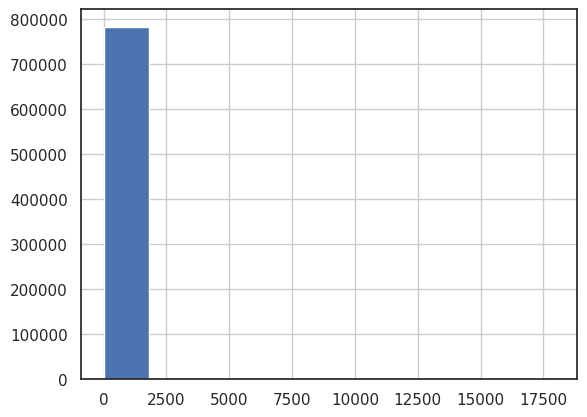

col:  fwd_pkts_tot


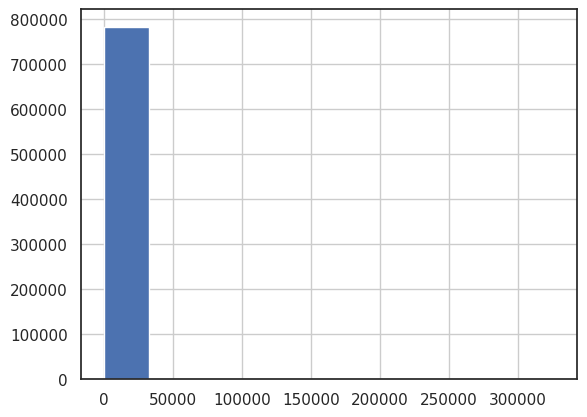

col:  bwd_pkts_tot


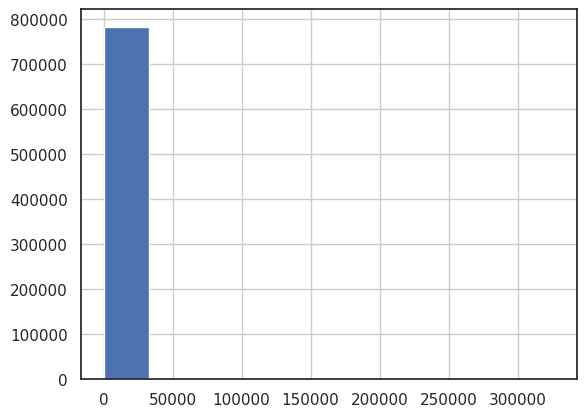

col:  fwd_data_pkts_tot


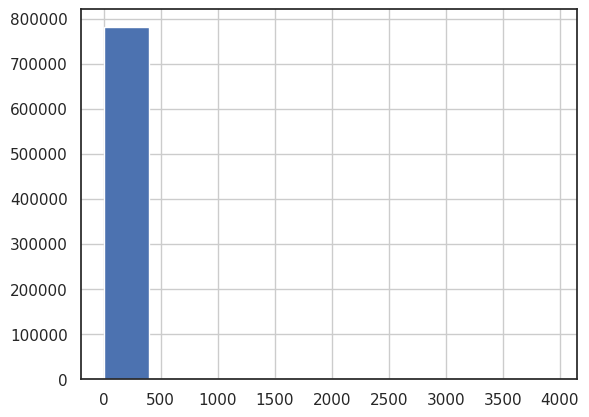

col:  bwd_data_pkts_tot


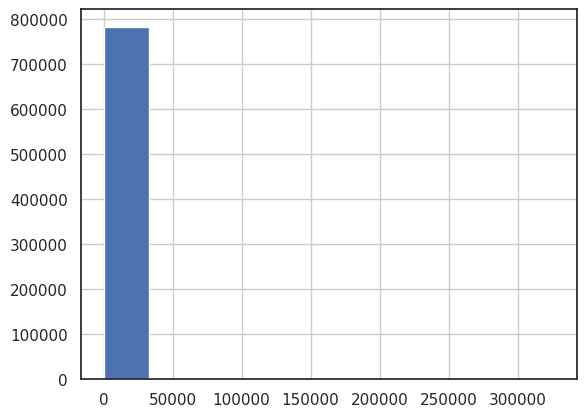

col:  fwd_pkts_per_sec


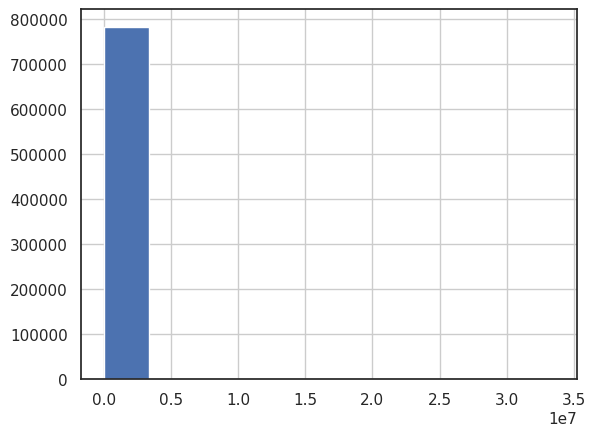

col:  bwd_pkts_per_sec


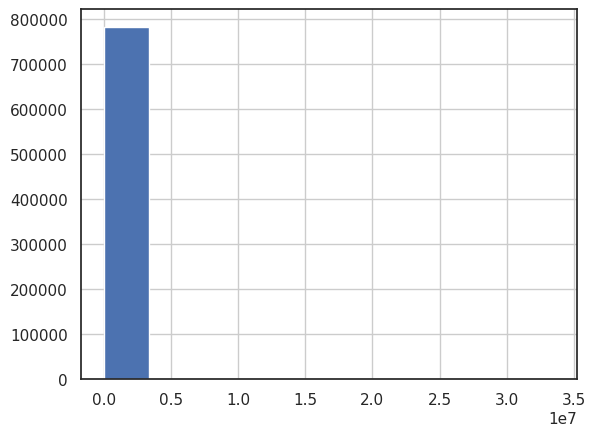

col:  flow_pkts_per_sec


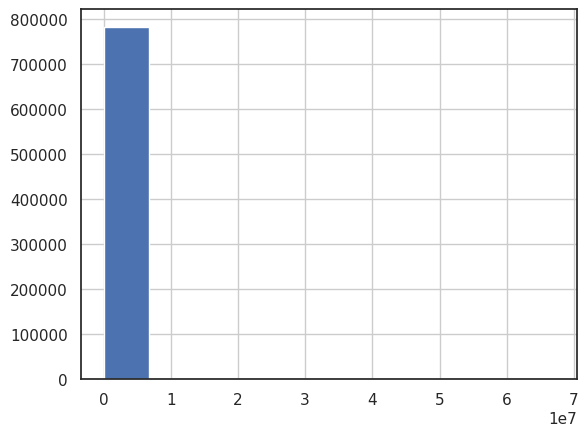

col:  down_up_ratio


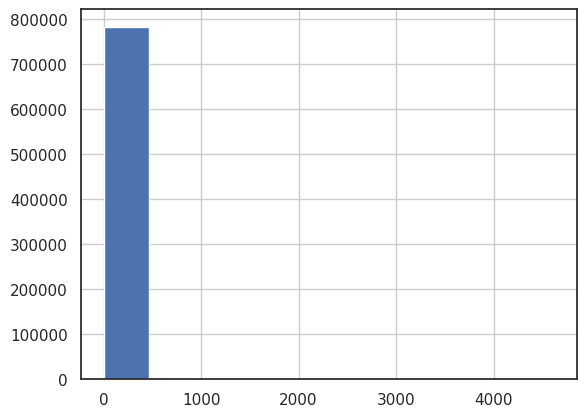

col:  fwd_header_size_tot


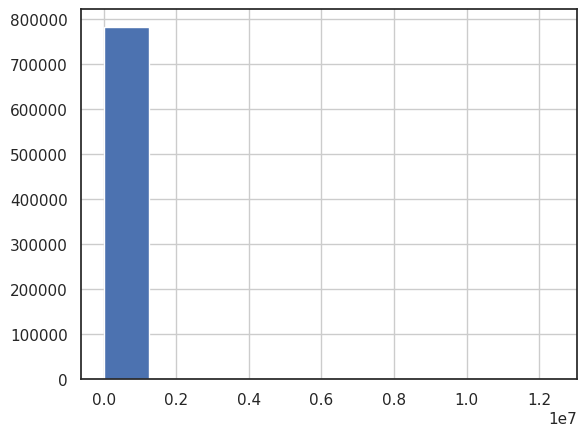

col:  fwd_header_size_min


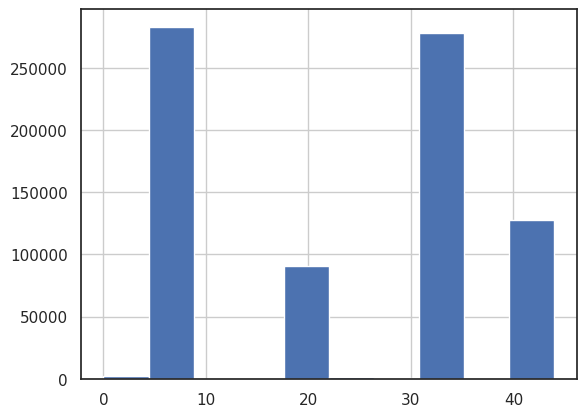

col:  fwd_header_size_max


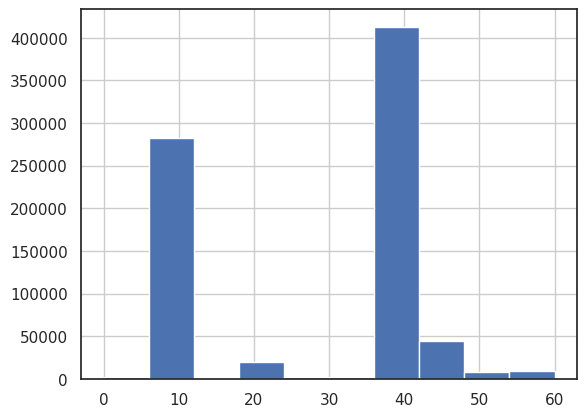

col:  bwd_header_size_tot


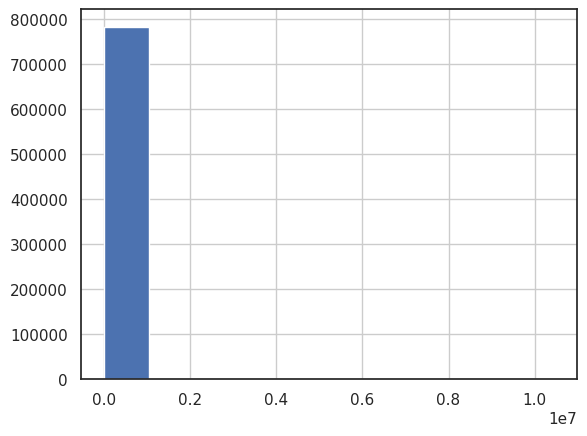

col:  bwd_header_size_min


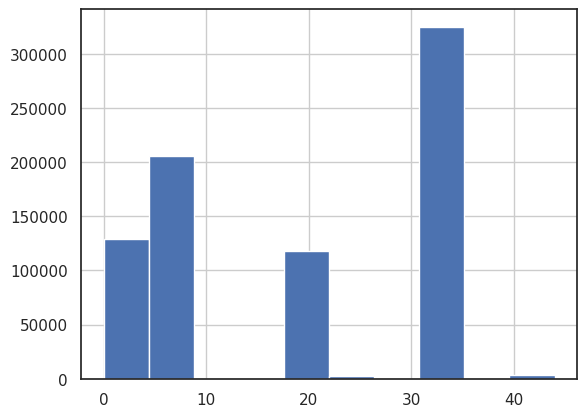

col:  bwd_header_size_max


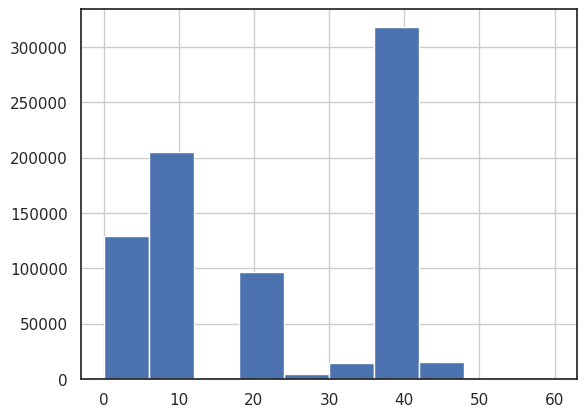

col:  flow_FIN_flag_count


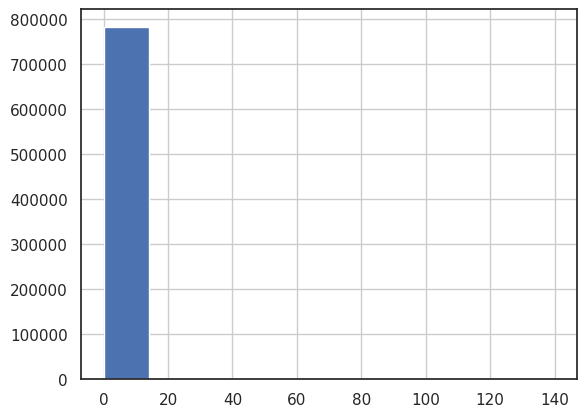

col:  flow_SYN_flag_count


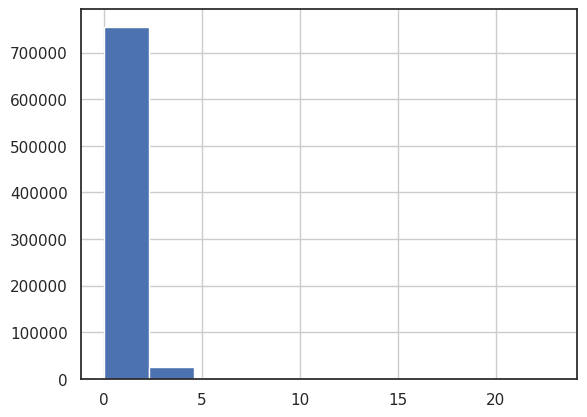

col:  flow_RST_flag_count


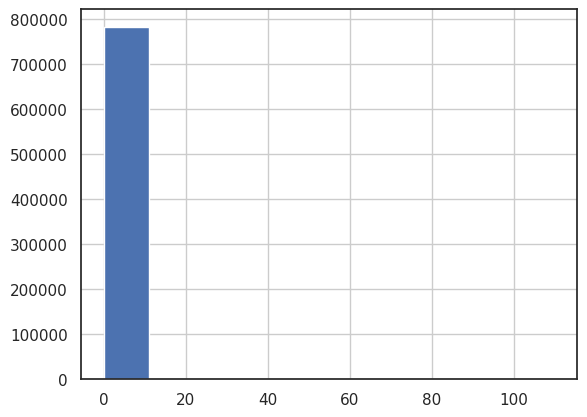

col:  fwd_PSH_flag_count


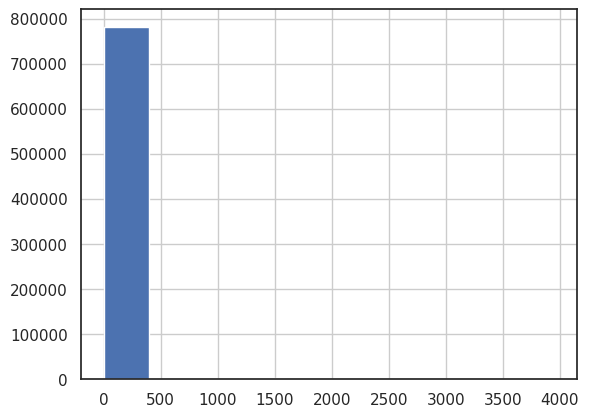

col:  bwd_PSH_flag_count


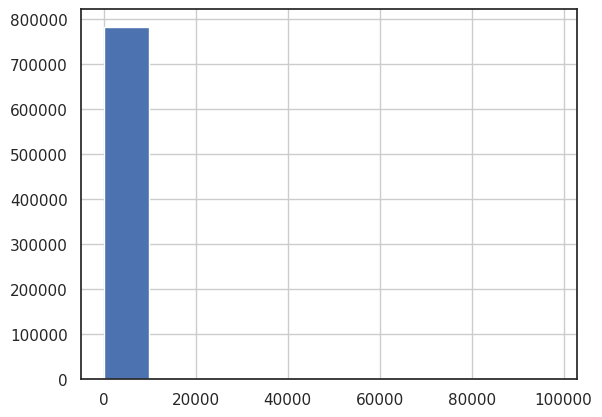

col:  flow_ACK_flag_count


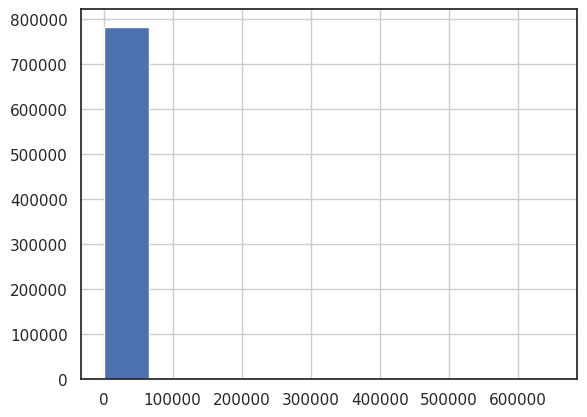

col:  fwd_URG_flag_count


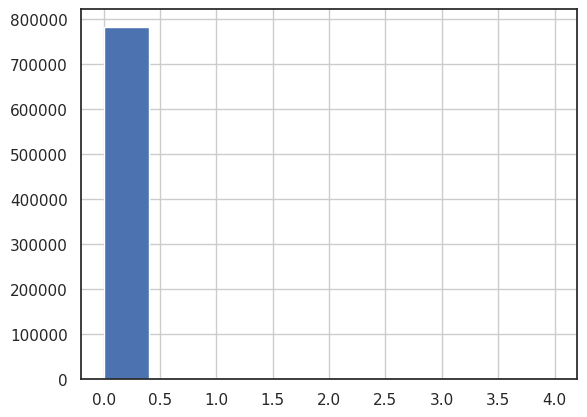

col:  bwd_URG_flag_count


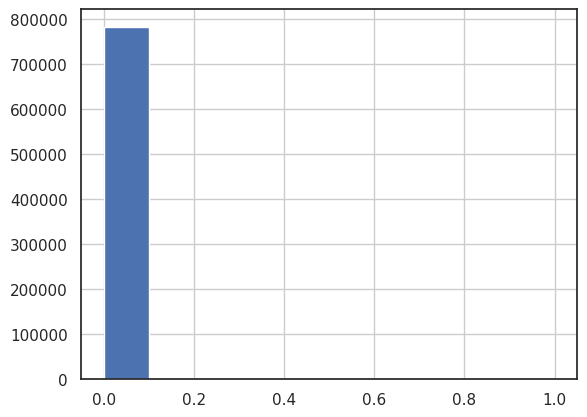

col:  flow_CWR_flag_count


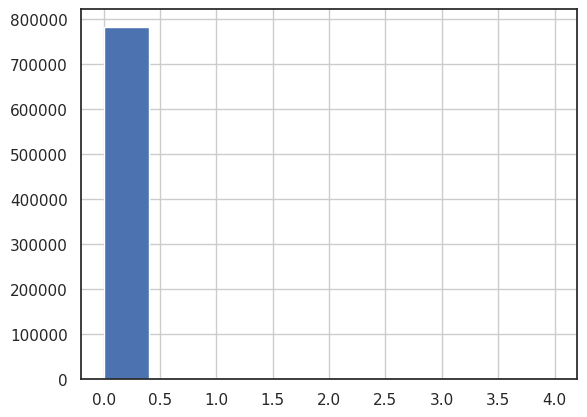

col:  flow_ECE_flag_count


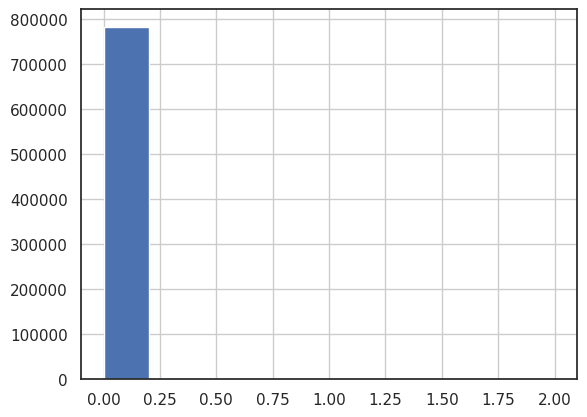

col:  fwd_pkts_payload.min


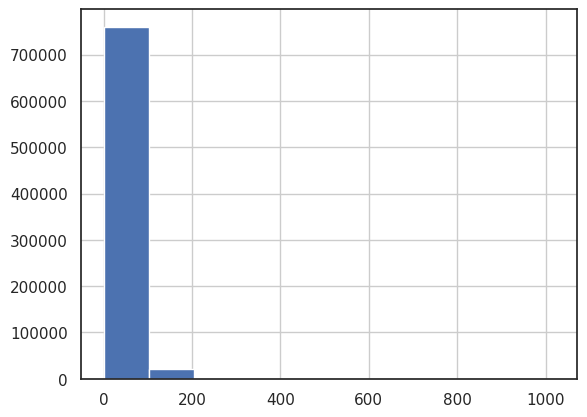

col:  fwd_pkts_payload.max


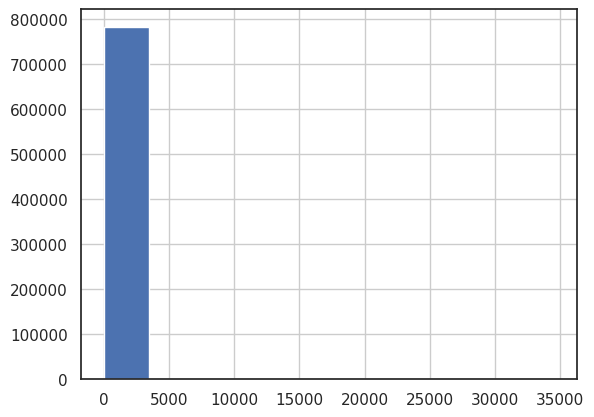

col:  fwd_pkts_payload.tot


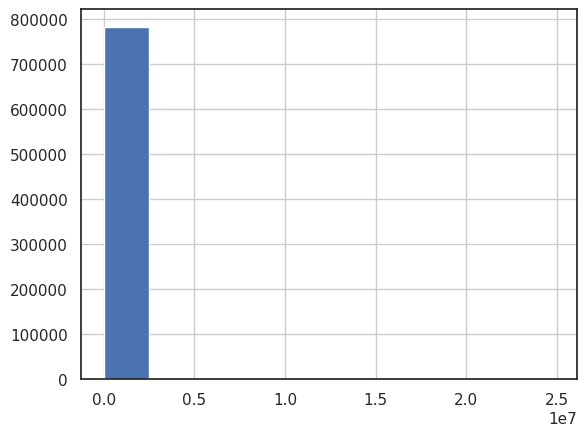

col:  fwd_pkts_payload.avg


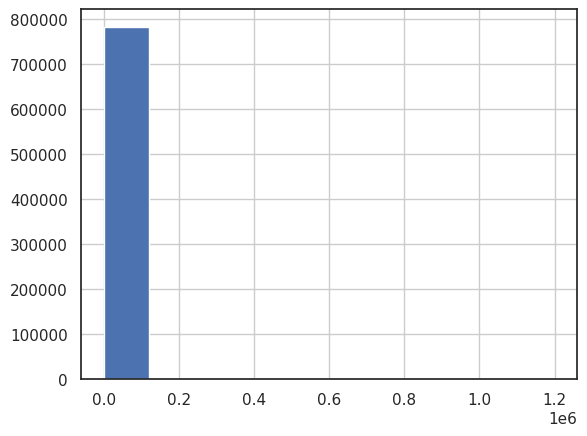

col:  fwd_pkts_payload.std


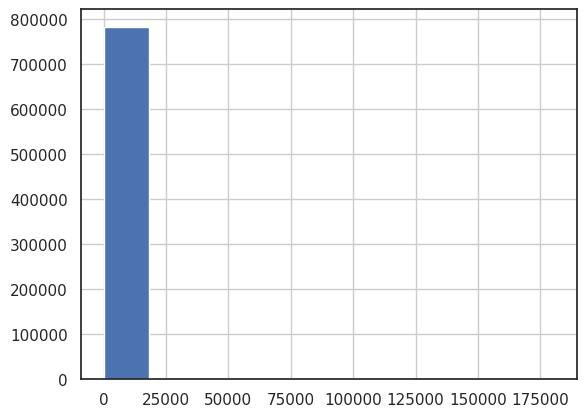

col:  bwd_pkts_payload.min


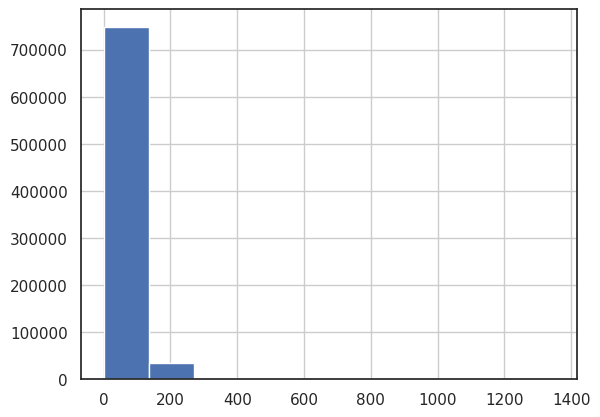

col:  bwd_pkts_payload.max


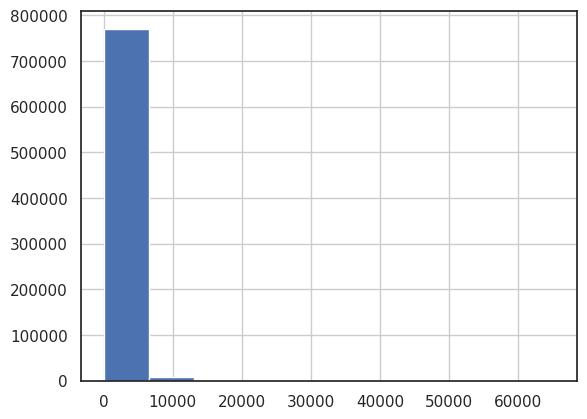

col:  bwd_pkts_payload.tot


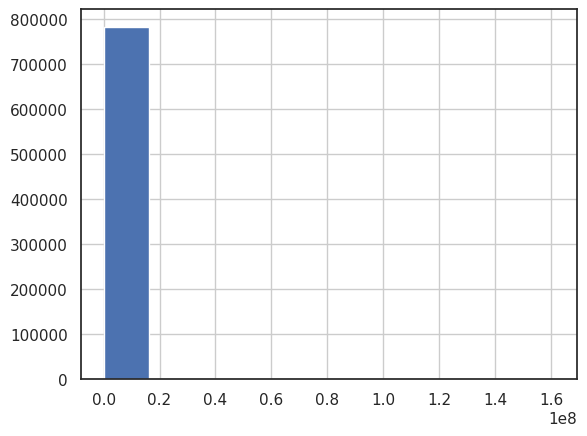

col:  bwd_pkts_payload.avg


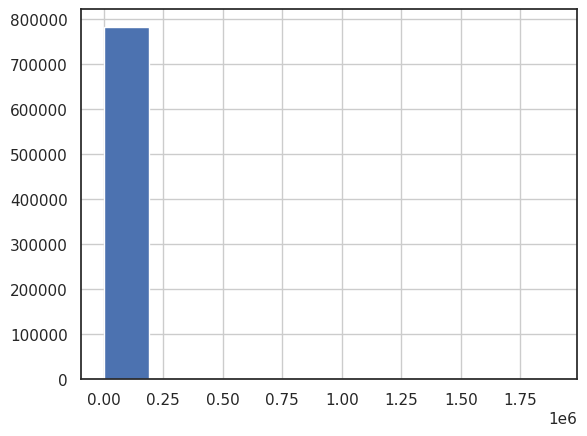

col:  bwd_pkts_payload.std


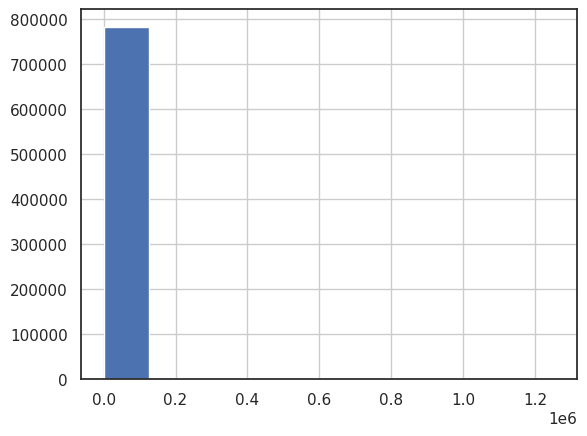

col:  flow_pkts_payload.min


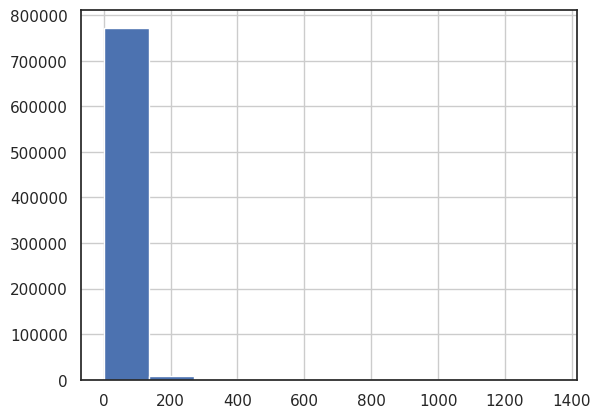

col:  flow_pkts_payload.max


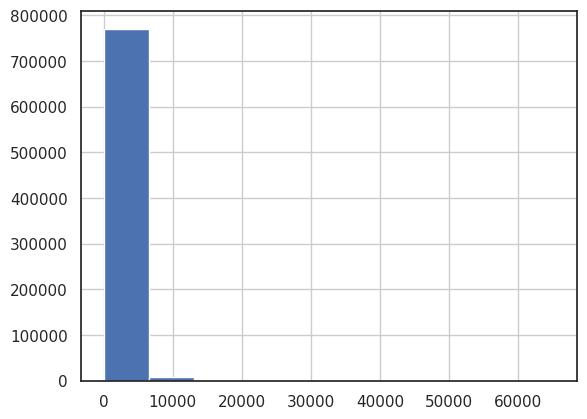

col:  flow_pkts_payload.tot


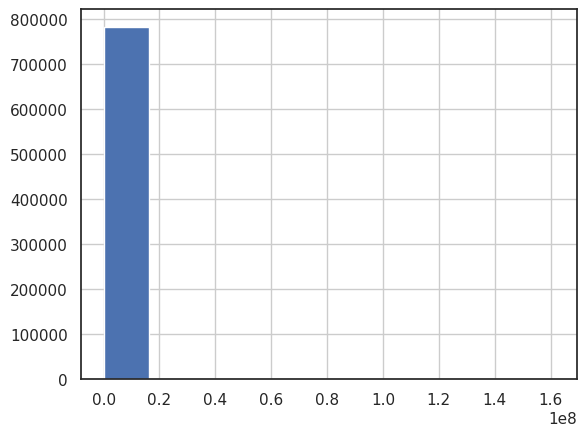

col:  flow_pkts_payload.avg


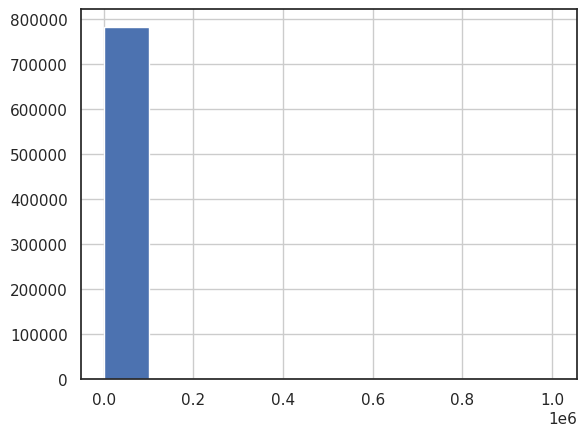

col:  flow_pkts_payload.std


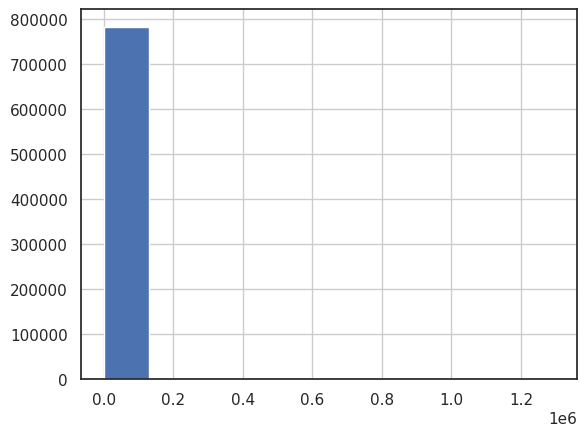

col:  fwd_iat.min


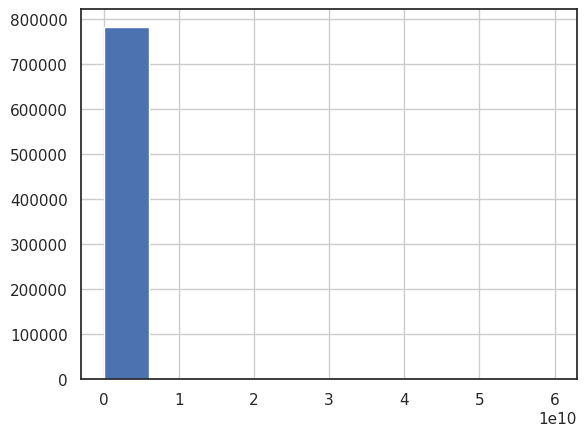

col:  fwd_iat.max


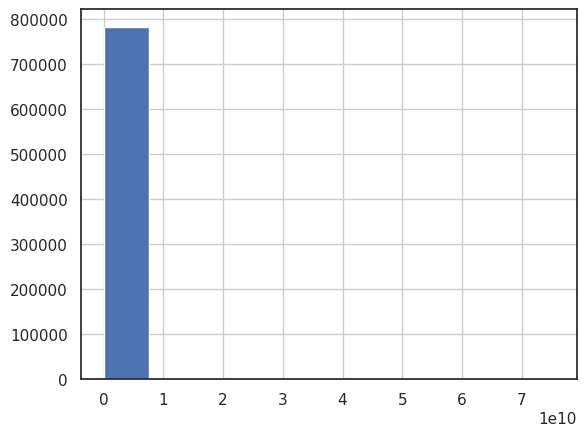

col:  fwd_iat.tot


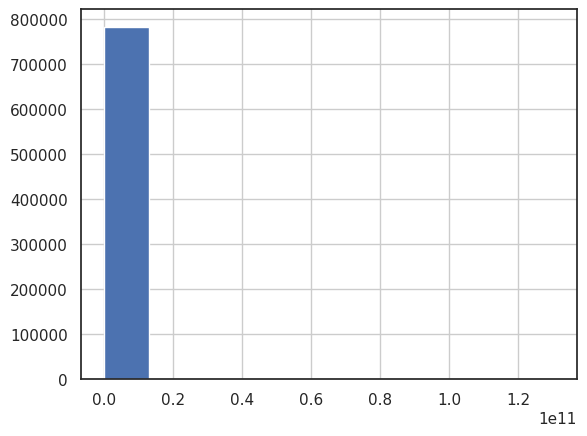

col:  fwd_iat.avg


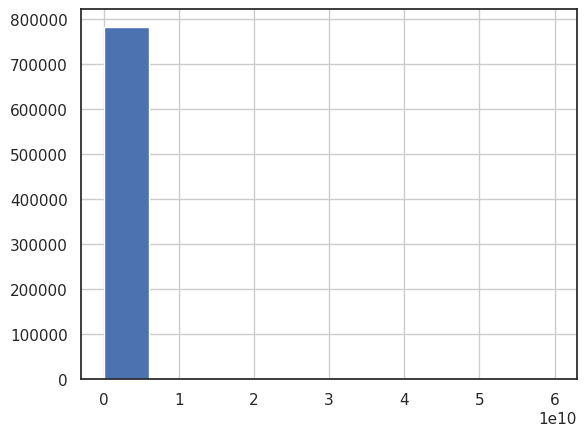

col:  fwd_iat.std


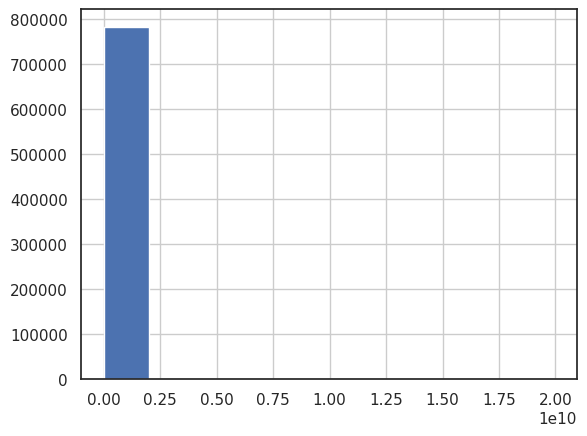

col:  bwd_iat.min


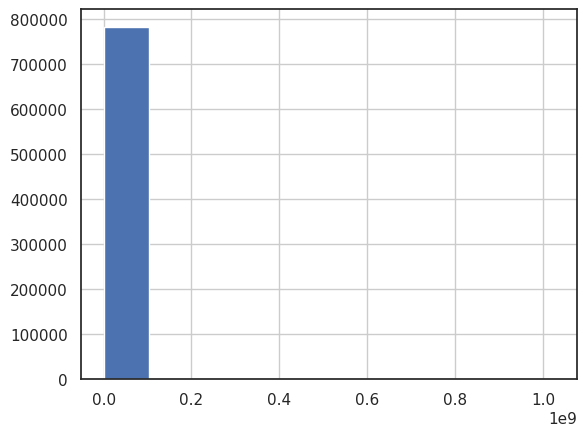

col:  bwd_iat.max


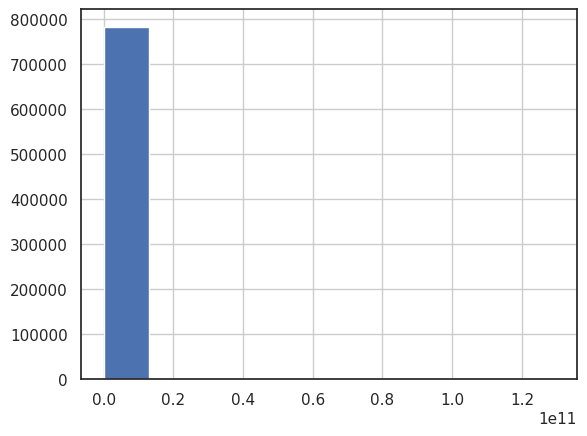

col:  bwd_iat.tot


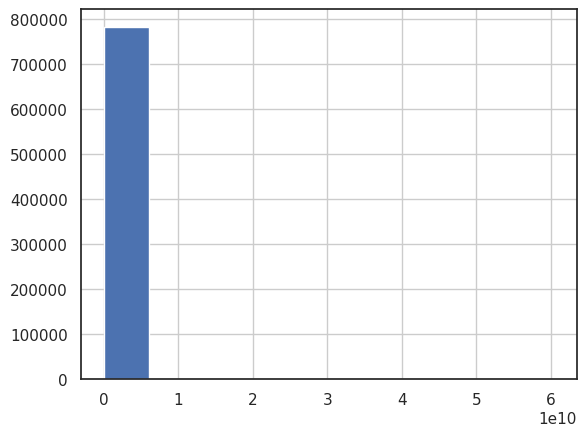

col:  bwd_iat.avg


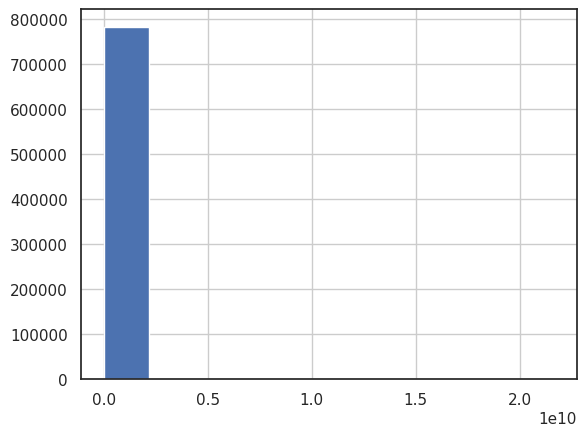

col:  bwd_iat.std


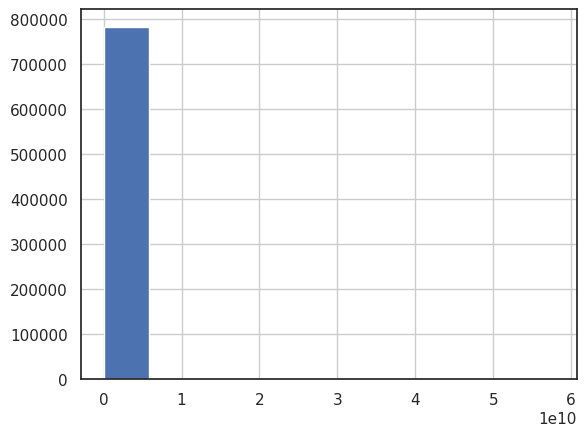

col:  flow_iat.min


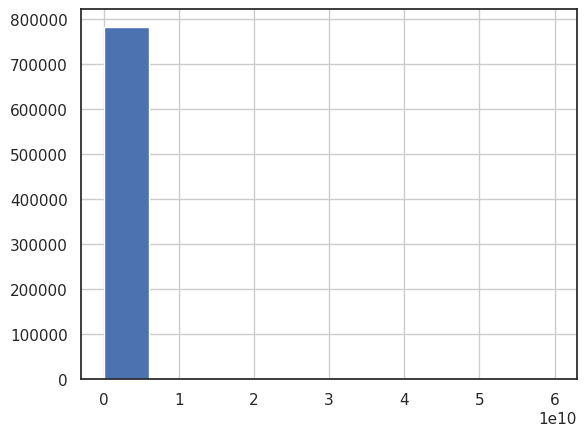

col:  flow_iat.max


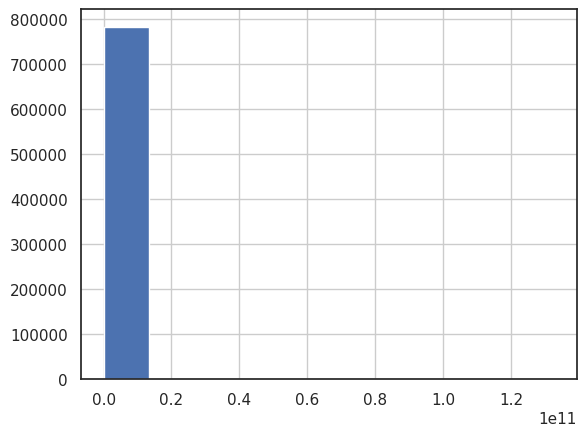

col:  flow_iat.tot


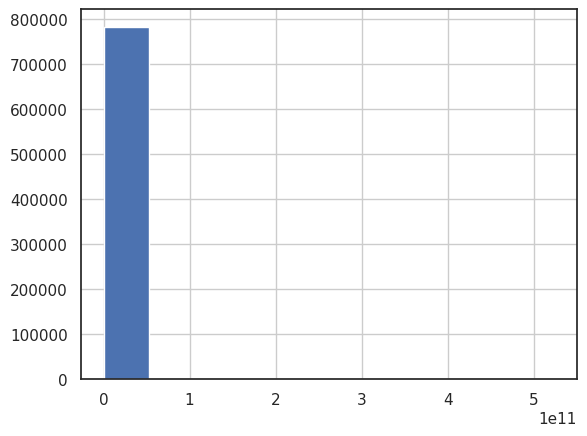

col:  flow_iat.avg


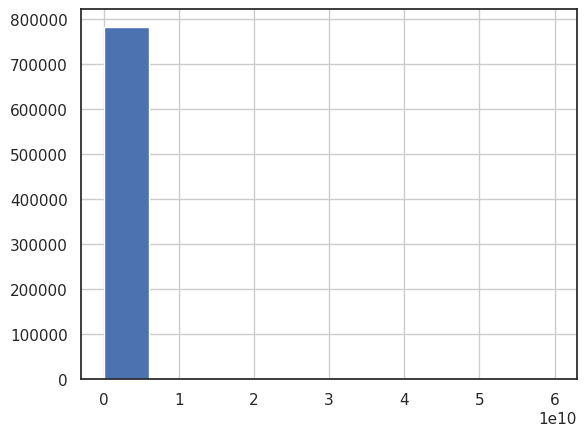

col:  flow_iat.std


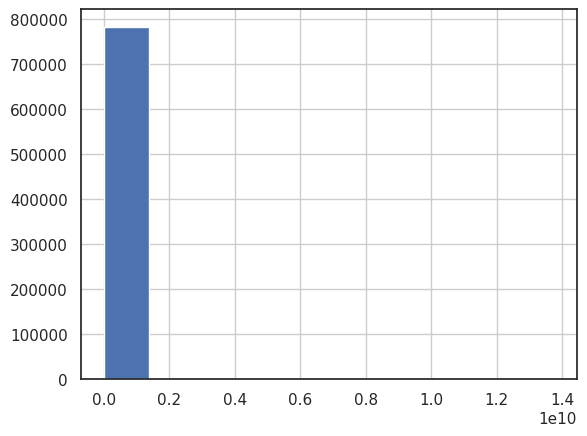

col:  payload_bytes_per_second


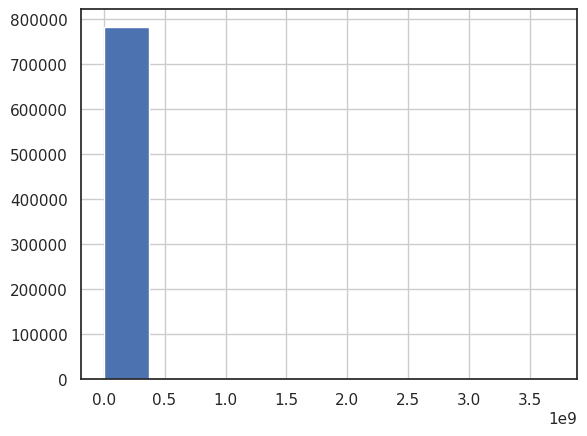

col:  fwd_subflow_pkts


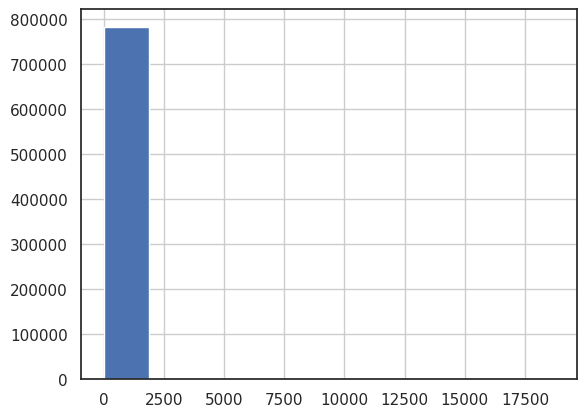

col:  bwd_subflow_pkts


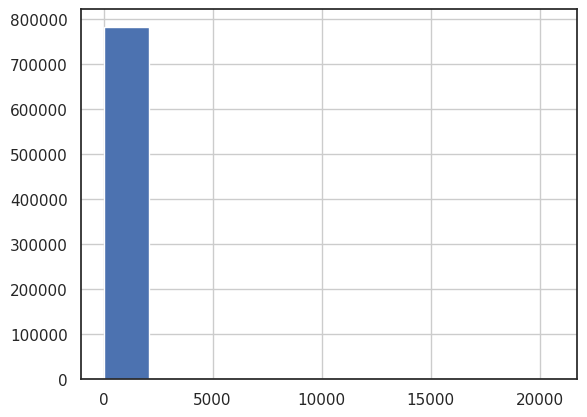

col:  fwd_subflow_bytes


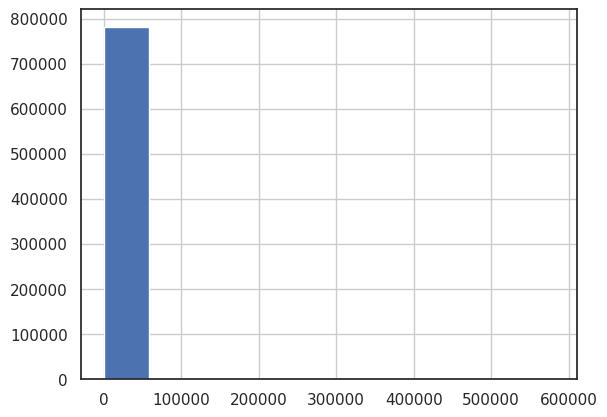

col:  bwd_subflow_bytes


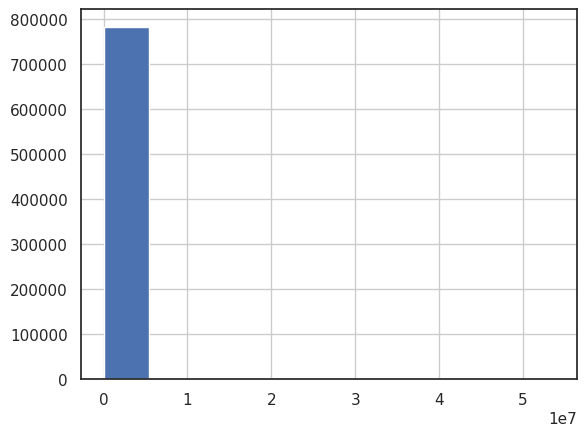

col:  fwd_bulk_bytes


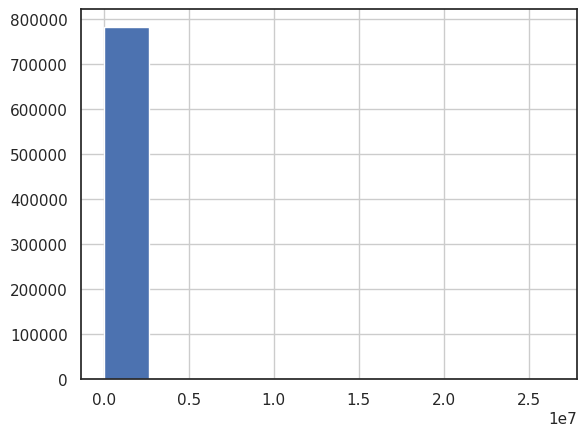

col:  bwd_bulk_bytes


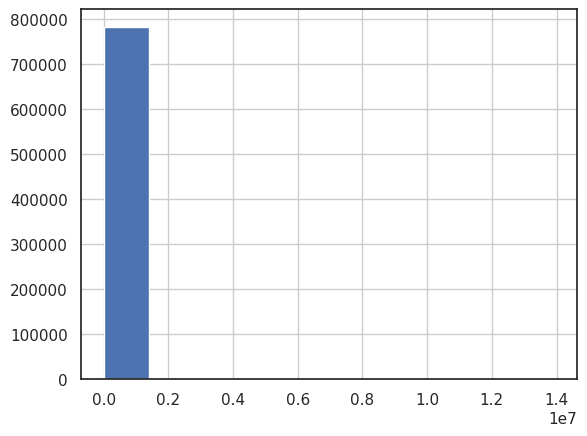

col:  fwd_bulk_packets


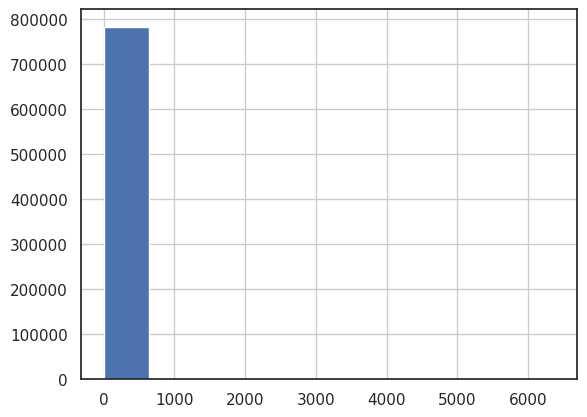

col:  bwd_bulk_packets


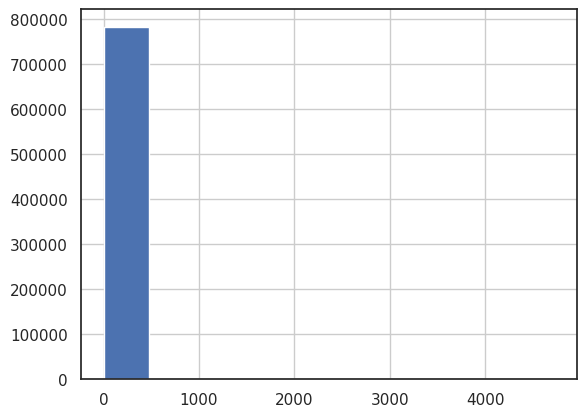

col:  fwd_bulk_rate


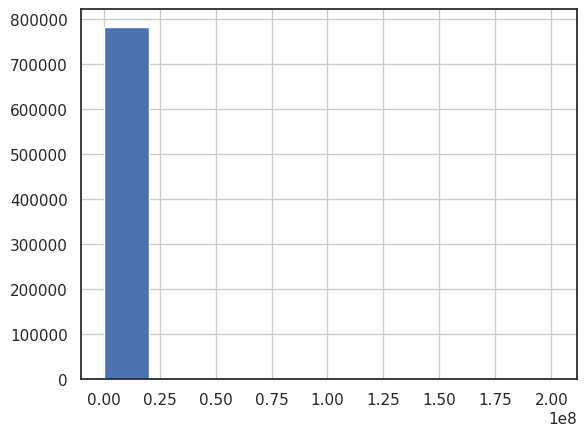

col:  bwd_bulk_rate


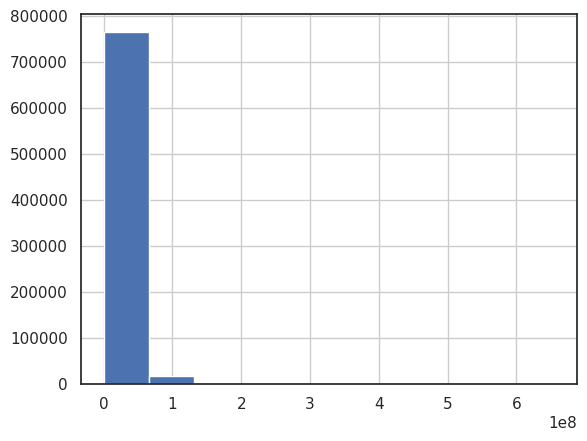

col:  active.min


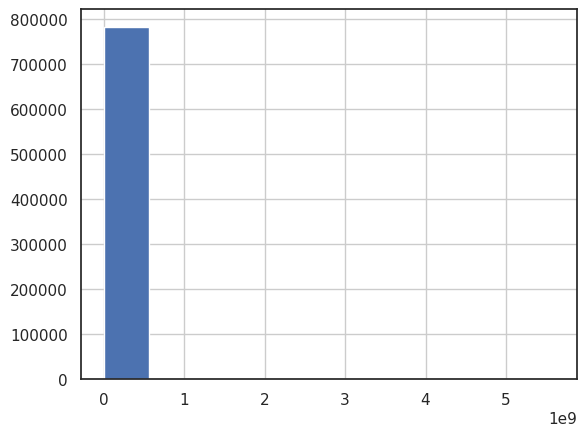

col:  active.max


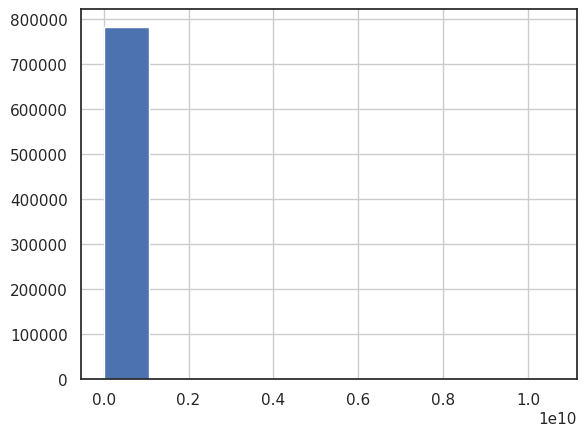

col:  active.tot


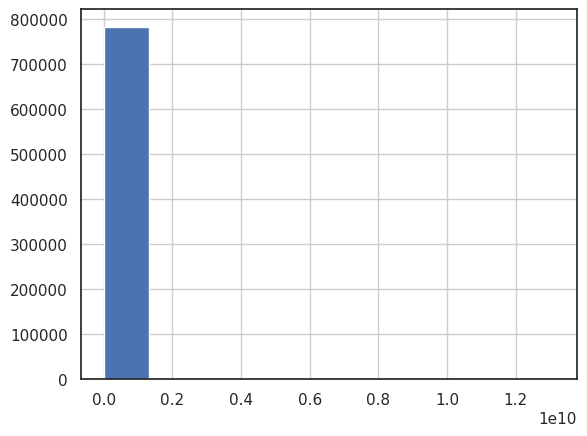

col:  active.avg


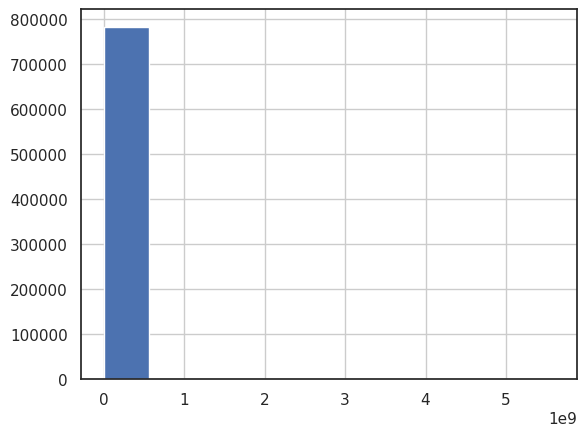

col:  active.std


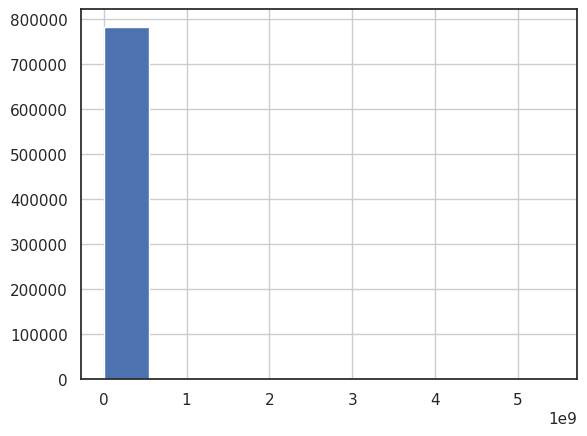

col:  idle.min


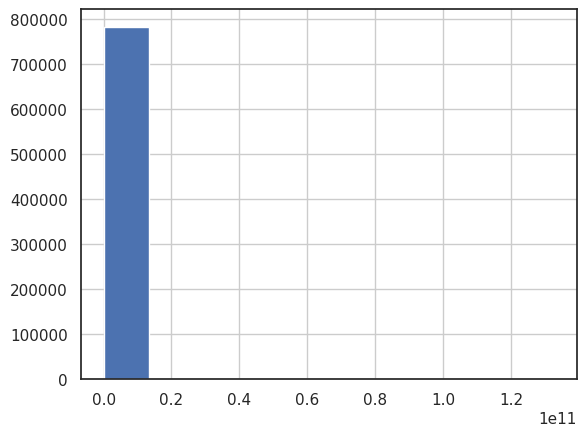

col:  idle.max


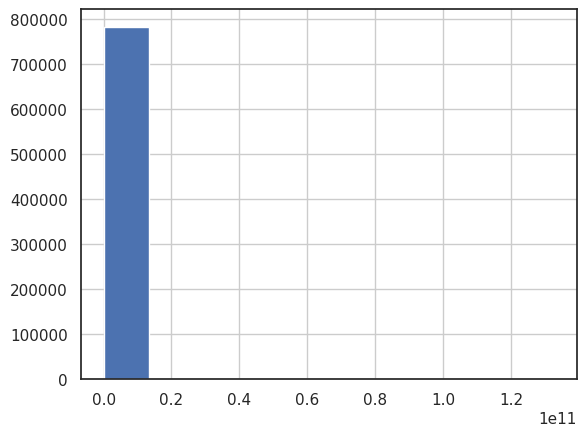

col:  idle.tot


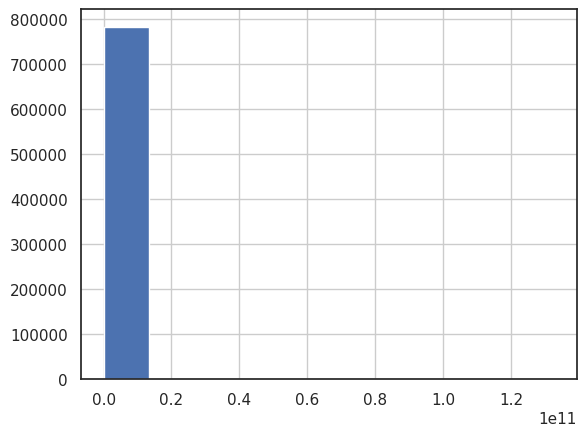

col:  idle.avg


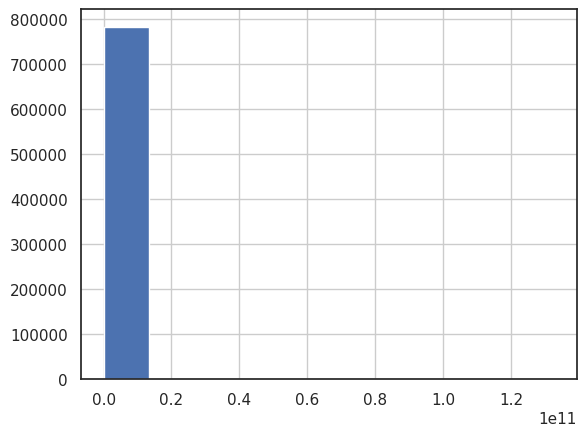

col:  idle.std


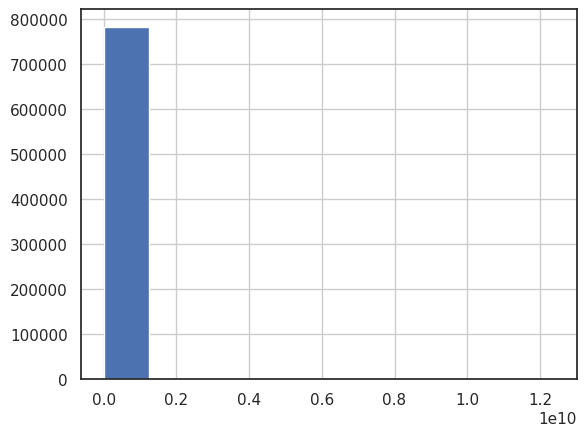

col:  fwd_init_window_size


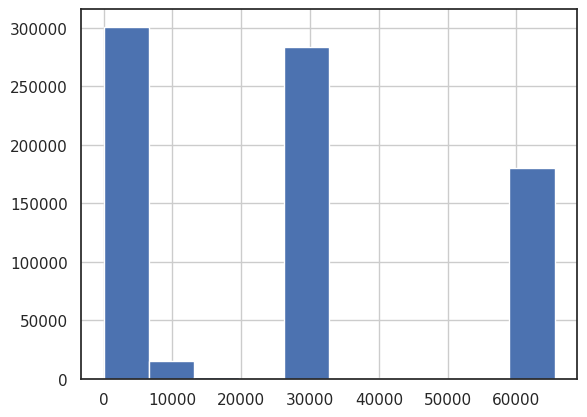

col:  bwd_init_window_size


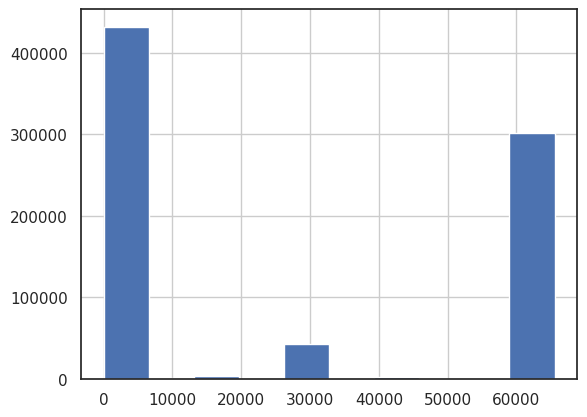

col:  fwd_last_window_size


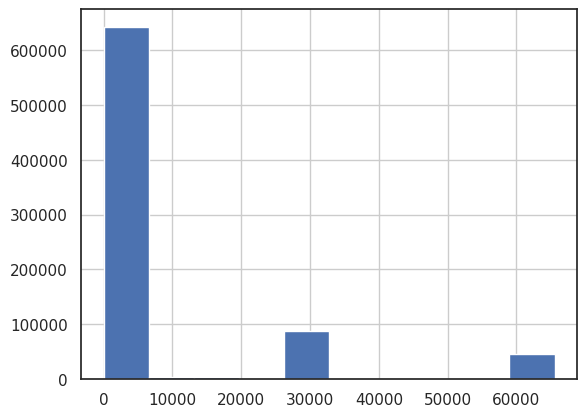

col:  traffic_category


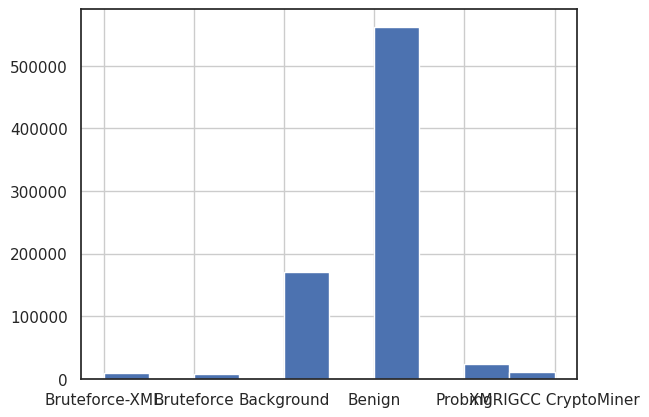

col:  Label


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

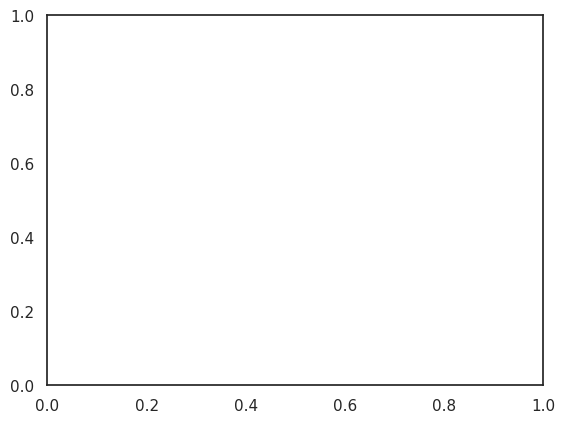

In [32]:
for col in ds.columns:
    print("col: ", col)
    ds[col].hist()
    plt.show()